<a href="https://colab.research.google.com/github/HAR5HA-7663/MCS-5993-Evolutionary-Computation-and-Deep-Learning/blob/main/Assignments/ES11_15_Harsha_Yellela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LTU MCS5993 by CJ Chung, F2025
# **ES(1+1) with 1/5 Success Rule**

### HW2 Assignment Disclaimer
*	Author Name: V Harsha Yellela
*	LTU ID: 000798754
*	Work Ownership: This work is my own. It is not copied from classmates (Yes/No): Yes
*	AI Assistance: Percentage of code generated with AI tools
(If greater than 0%, briefly describe how AI was used): 35% used ai to understand Himmelblau & Ackley optimizations in deep.
*	Understanding: I understand every part of this code (Yes/No):  Yes
*	Confidence: I am confident that I can modify, adapt, and extend this code on my own (Yes/No): Yes

In [36]:
import numpy as np

def sphere_n(x): # generalized sphere with n variables
    return np.sum(x*x)

# (x+1)(x-1)(x-2)
def findroot(x):
    #return (x[0]**3-2*x[0]**2-x[0]+2)**2
    return abs( (x[0]**3-2*x[0]**2-x[0]+2) )

In [37]:
def booth(x):
    """
    Compute the Booth function for given input vector x.

    Parameters:
    x (tuple or list): Input vector (x1, x2).

    Returns:
    float: The value of the Booth function.
    """
    x1, x2 = x
    term1 = x1 + 2 * x2 - 7
    term2 = 2 * x1 + x2 - 5
    return term1**2 + term2**2

# Example usage
x = (1, 3)  # Example input
print("Booth function value at x =", x, "is", booth(x))


Booth function value at x = (1, 3) is 0


In [38]:
def ackley(x):
    """
    Compute the Ackley function for a given input vector x.

    Parameters:
    x (numpy.ndarray): Input vector.

    Returns:
    float: The value of the Ackley function.
    """
    # Convert x to a numpy array in case it's a list
    x = np.array(x)

    # Number of dimensions
    n = len(x)

    # Compute the Ackley function
    term1 = -20 * np.exp(-0.2 * np.sqrt(np.mean(x**2)))
    term2 = -np.exp(np.mean(np.cos(2 * np.pi * x)))

    # Ackley function value
    result = term1 + term2 + 20 + np.e

    return result

# Example usage
x = np.array([0, 0])
print("Ackley function value at x =", x, "is", ackley(x))


Ackley function value at x = [0 0] is 4.440892098500626e-16


In [39]:
def himmelblau(x):
    """
    Compute the Himmelblau function for a given input vector x.
    It's known for having multiple local minima.
    https://en.wikipedia.org/wiki/Himmelblau%27s_function
    Parameters:
    x (list or tuple): Input vector (x1, x2).

    Returns:
    float: The value of the Himmelblau function.
    """
    x1, x2 = x
    term1 = (x1**2 + x2 - 11)**2
    term2 = (x1 + x2**2 - 7)**2
    return term1 + term2

# Example usage
x = (3, 2)
print("Himmelblau function value at x =", x, "is", himmelblau(x))

Himmelblau function value at x = (3, 2) is 0


In [40]:
def ES11oneFifth(objfunc, numVar, low=-5, high=5, minima=0):
  global totgen, foundCnt
  global X_trajectory, Y_trajectory

  stepSize_i = 0.82 # initial stepsize
  stepSize_r = 0.82 # stepsize change ratio.
  # 0.82 was used previously by Hans-Paul Schwefel, a PhD student of Rechenberg
  xp = np.empty(numVar) # parent
  p_val = 0
  xo = np.empty(numVar) # offspring
  o_val = 0

  successCnt = 0;
  WindowSize = 40

  for j in range(0, numVar):
    xp[j] = np.random.uniform(low, high) # uniform random number to init parent
    # https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

  print(f"Initial parent = {xp}")
  p_val = objfunc(xp)     # evaluate the parent
  if numVar==2:
    X_trajectory = np.append(X_trajectory, xp[0])
    Y_trajectory = np.append(Y_trajectory, xp[1])

  stepSize = stepSize_i

  for g in range(1, MaxGen+1):
    if (g % WindowSize) == 0: # update stepsize. Complete lines below,
        if successCnt > (WindowSize*0.2):
            stepSize /= stepSize_r
        elif successCnt < (WindowSize*0.2):
            stepSize *= stepSize_r

        if stepSize < 1e-8:
            stepSize = 1e-8
        if stepSize > (high - low):
            stepSize = (high - low)

        successCnt = 0

    # mutate
    for j in range(0, numVar):
      xo[j] = xp[j] + np.random.normal(0.0, stepSize)                 # <==========

      # to correct if any variation goes out of acceptable range
      if xo[j] < low: xo[j] = low
      elif xo[j] > high: xo[j] = high
    o_val = objfunc(xo)  # evaluate offspring
    # print(xo, o_val)

    # select
    if o_val < p_val: # offspring is better. Complete lines below
        xp = xo.copy()
        p_val = o_val
        successCnt += 1

        if numVar==2:
            X_trajectory = np.append(X_trajectory, xp[0])
            Y_trajectory = np.append(Y_trajectory, xp[1])

    if p_val < minima+EPSILON:
      print(f"Acceptable solution found after {g} iterations:")
      totgen += g
      foundCnt += 1
      return xp, p_val, g
  return xp, p_val, g

In [41]:
import matplotlib.pyplot as plt

def plot_contour(obj_func, low=-5, high=5):
  xlist = np.linspace(low, high, 200)
  ylist = np.linspace(low, high, 200)
  X, Y = np.meshgrid(xlist, ylist)
  plt.figure(figsize=(3,3))
  # Evaluate the objective function for each point in the meshgrid
  Z = np.array([[obj_func(np.array([x, y])) for x in xlist] for y in ylist])
  cp = plt.contour(X, Y, Z)
  plt.scatter(X_trajectory[0], Y_trajectory[0], color='blue') # initial p
  plt.scatter(X_trajectory[1:-1], Y_trajectory[1:-1], color='black', s=1) # s: markersize
  plt.scatter(X_trajectory[-1], Y_trajectory[-1], color='red') # -1 indices the last element
  plt.clabel(cp, inline=True, fontsize=10)
  plt.title('Contour Plot')
  plt.xlabel('x0')
  plt.ylabel('x1')
  plt.show()
  return

---------------- findroot ---------------
Initial parent = [-3.17766224]
Acceptable solution found after 1244 iterations:
T=0, Min_Eval= 0.00005 at [-1.0000081], gen=1244
Initial parent = [0.14678405]
Acceptable solution found after 973 iterations:
T=1, Min_Eval= 0.00004 at [-0.99999275], gen=973
Initial parent = [-4.03634639]
Acceptable solution found after 1596 iterations:
T=2, Min_Eval= 0.00002 at [-1.00000261], gen=1596
System Success = 100.0%
Avgerage # of generations used = 1,271

---------------- sphere_n ---------------
Initial parent = [-0.49700607 -0.98893241  2.52427586  0.38416819 -1.30692114 -0.59319293
  0.41343469 -3.0031233   2.05587535 -0.09159059  2.10376293 -3.62101936
 -0.44566779  0.04130392 -4.94426265  2.44081867 -1.44179241  3.59217288
 -1.45424403 -2.5704478 ]
Acceptable solution found after 1418 iterations:
T=0, Min_Eval= 0.00004 at [-2.96741762e-03  1.02672592e-03  2.09654341e-03 -1.97090472e-05
  2.02269783e-04 -2.03305248e-03  1.54623069e-03  1.09478868e-03

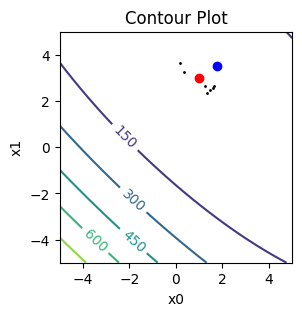

Initial parent = [-3.71369495  1.90241732]
Acceptable solution found after 389 iterations:
T=1, Min_Eval= 0.00000 at [0.99914199 3.00153603], gen=389


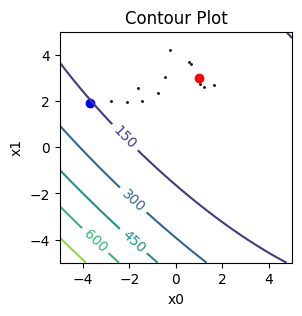

Initial parent = [-2.38663233 -2.23566003]
Acceptable solution found after 672 iterations:
T=2, Min_Eval= 0.00000 at [1.00042962 2.99993988], gen=672


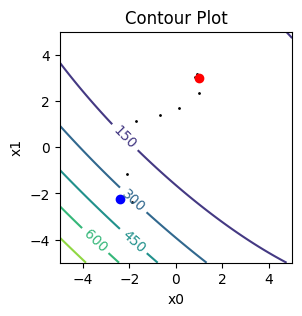

System Success = 100.0%
Avgerage # of generations used = 560

---------------- ackley ---------------
Initial parent = [ 4.64065348 -4.59745334]
Acceptable solution found after 1940 iterations:
T=0, Min_Eval= 0.00002 at [6.54842758e-06 3.95486187e-06], gen=1940


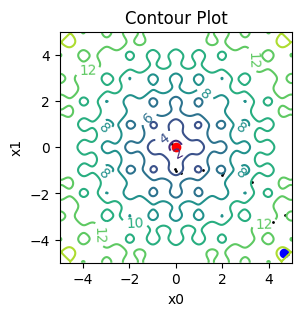

Initial parent = [ 1.2248623  -0.08134014]
Acceptable solution found after 1599 iterations:
T=1, Min_Eval= 0.00002 at [-4.46521696e-06 -6.11014114e-06], gen=1599


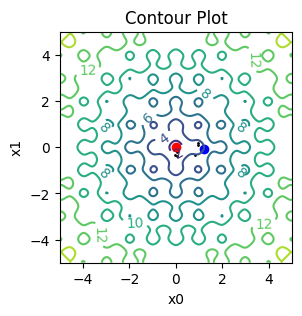

Initial parent = [-2.26448881  1.29758549]
Acceptable solution found after 1822 iterations:
T=2, Min_Eval= 0.00005 at [-1.53762110e-05 -7.32888349e-06], gen=1822


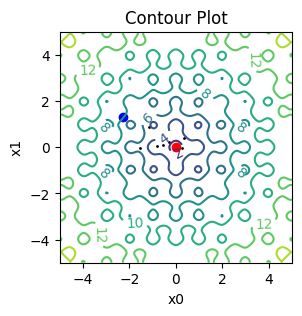

System Success = 100.0%
Avgerage # of generations used = 1,787

---------------- himmelblau ---------------
Initial parent = [1.28685691 0.76167993]
Acceptable solution found after 879 iterations:
T=0, Min_Eval= 0.00002 at [2.9996334  2.00127798], gen=879


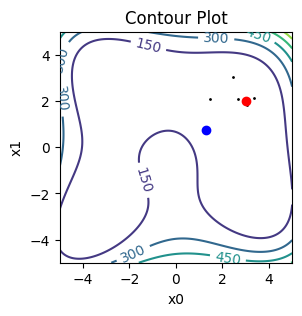

Initial parent = [-0.35411785 -0.42961602]
Acceptable solution found after 821 iterations:
T=1, Min_Eval= 0.00004 at [2.99966008 1.99867381], gen=821


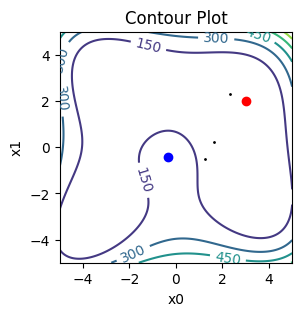

Initial parent = [-3.8977263   4.09466374]
Acceptable solution found after 874 iterations:
T=2, Min_Eval= 0.00004 at [-2.80409452  3.13106308], gen=874


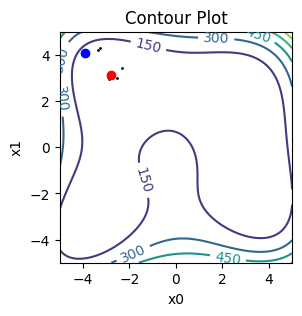

System Success = 100.0%
Avgerage # of generations used = 858



In [42]:
######### M A I N #########
import time
MaxGen = 10000
EPSILON = 0.00005
np.random.seed(int(time.time()))

# 2D minimization functions
MaxTrial = 3
functions = ((findroot, 1), (sphere_n, 20), (booth, 2),(ackley,2),(himmelblau, 2),)

for (func, nv) in functions:
  print(f"---------------- {func.__name__} ---------------")
  totgen = 0
  foundCnt = 0  # acceptable solution found

  for trial in range(0, MaxTrial):
    X_trajectory = np.array([])
    Y_trajectory = np.array([])
    X, eval, g = ES11oneFifth(func, nv)

    print(f"T={trial}, Min_Eval= {eval:.5f} at {X}, gen={g}")
    if nv == 2:
      plot_contour(obj_func=func)
  print(f"System Success = {foundCnt/MaxTrial*100}%")
  totgen += (MaxTrial-foundCnt)*MaxGen
  print(f"Avgerage # of generations used = {(totgen/MaxTrial):,.0f}\n")